In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(Path("lending_data.csv"))

# Review the DataFrame
print(df.head())
print(df.info())
print(df.describe())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop(columns=["loan_status"])


In [6]:
# Review the y variable Series
print(y.head(10))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: loan_status, dtype: int64


In [7]:
# Review the X variable DataFrame
print(X.head(10))



   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   
5    10100.0          7.438            50600        0.407115                4   
6    10300.0          7.490            51100        0.412916                4   
7     8800.0          6.857            45100        0.334812                3   
8     9300.0          7.096            47400        0.367089                3   
9     9700.0          7.248            48800        0.385246                4   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2     

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function             pareto principle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62028, 7)
X_test shape: (15508, 7)
y_train shape: (62028,)
y_test shape: (15508,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [12]:
# Make a prediction using the testing data
predictions = model.predict(X_test)

print(predictions[:10])
print(y_test.iloc[:10].values)

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
print(cm)
#[[TN, FP]
#[FN, TP]]

[[14926    75]
 [   46   461]]


In [14]:
# Print the classification report for the model
cr = classification_report(y_test, predictions)
print(cr)

# Accuracy: (TP + TN) / Total
# Precision: TP / (TP + FP)
# Recall: TP / (TP + FN)
# F1-score: 2 * (Precision * Recall) / (Precision + Recall)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model was very good for both classifications, especially for the low-risk loan classifications (0). Strangely so considering I printed out the coefficients for each feature and they were all close to zero and I didnt even scale the data. It's obvious this data set was curated especially for this assignment in my opinion, since such small coeeficients would typically mean the features have virtually no effect on the predictions. Typically I would be suspicious about overfitting or some other anomaly.

Either way, the f1 score and both the weighted average and macro average is superb and therefore so is the model.


Feature Analysis:
loan_size: -0.0000
interest_rate: -0.0000
borrower_income: -0.0004
debt_to_income: -0.0000
num_of_accounts: 0.0000
derogatory_marks: 0.0000
total_debt: 0.0006

Permutation Importance:
            feature  importance
6        total_debt    0.080081
2   borrower_income    0.016546
1     interest_rate    0.000000
3    debt_to_income    0.000000
4   num_of_accounts    0.000000
5  derogatory_marks    0.000000
0         loan_size   -0.000426


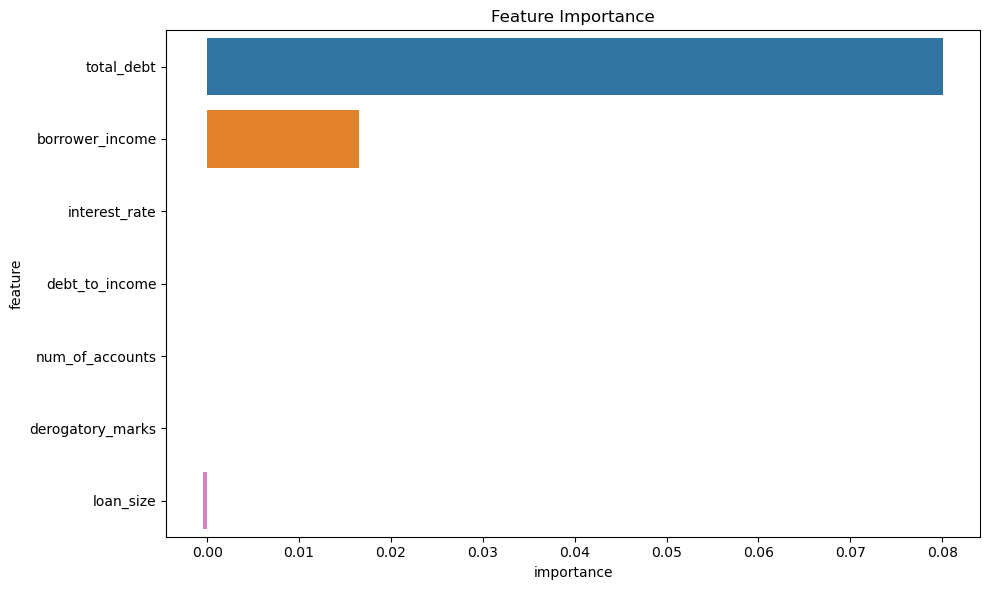

In [15]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Feature Analysis
print("\nFeature Analysis:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

print("\nPermutation Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


Cross-Validation Scores:
[0.99123033 0.99264848 0.9920681  0.99284194 0.99142323]
Mean CV Score: 0.9920
Standard Deviation of CV Scores: 0.0006


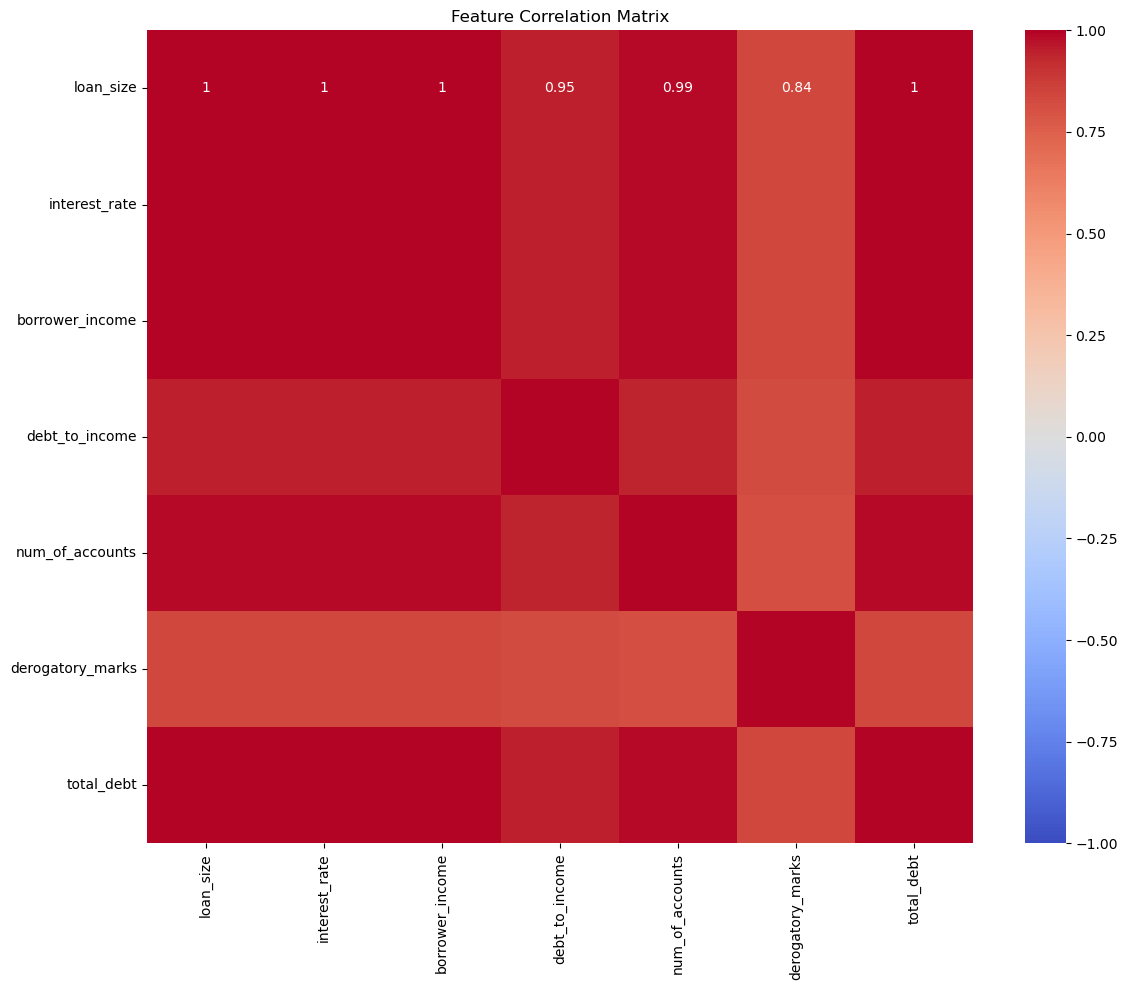

In [16]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

***Lets try Random Forest***

---

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
#Rnadom Forest Predictions
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.89      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.94      0.94     15508
weighted avg       0.99      0.99      0.99     15508



In [20]:
rf_cm = confusion_matrix(y_test, rf_predictions)
print(rf_cm)

rf_cr = classification_report(y_test, rf_predictions)
print(rf_cr)

[[14930    71]
 [   57   450]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.89      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.94      0.94     15508
weighted avg       0.99      0.99      0.99     15508

